In [116]:
#Set working directory
import matplotlib as plt
import pandas as pd
import os 
os.chdir("C:\\Users\\rohan\\Documents\\Analytics\\Data\\Bible")

In [117]:
#open the file
text_file = open("kjvdat.txt", "r")

#read the lines
lines = text_file.readlines()
print(lines[0:2])

#lines is of list data type
type(lines)

#Number of lines (verses)
len(lines)

['Gen|1|1| In the beginning God created the heaven and the earth.~\n', 'Gen|1|2| And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.~\n']


31102

In [118]:
#Remove the book, chapter and verse from each line
for i in range(0,len(lines)):
    lines[i] = lines[i].split('| ')[1][:-2]
    
#Quick sanity check
print(lines[0:2])

['In the beginning God created the heaven and the earth.', 'And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.']


In [119]:
#Convert list to string
bible = ' '.join(lines)

#Convert all words to lower case
bible = bible.lower()

#Split string to separate out each word
import re
bible2 = re.findall(r"[\w']+", bible)
print(bible2[0:100])


['in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth', 'and', 'the', 'earth', 'was', 'without', 'form', 'and', 'void', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep', 'and', 'the', 'spirit', 'of', 'god', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters', 'and', 'god', 'said', 'let', 'there', 'be', 'light', 'and', 'there', 'was', 'light', 'and', 'god', 'saw', 'the', 'light', 'that', 'it', 'was', 'good', 'and', 'god', 'divided', 'the', 'light', 'from', 'the', 'darkness', 'and', 'god', 'called', 'the', 'light', 'day', 'and', 'the', 'darkness', 'he', 'called', 'night', 'and', 'the', 'evening', 'and', 'the', 'morning', 'were', 'the', 'first', 'day', 'and', 'god', 'said', 'let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst']


In [120]:
#Number of words in the bible
print("Number of words in the bible : ", len(bible2))

Number of words in the bible :  789651


In [121]:
#Count the frequency of each word
from collections import Counter
#Word Frequency
counts = Counter(bible2)

In [122]:
#Convert counter object to data frame
word_count = pd.DataFrame.from_dict(counts, orient='index').reset_index()
word_count.rename(columns = {'index' : 'Word',0:'Frequency'},inplace = True)
word_count = word_count.sort_values('Frequency',ascending=False)

#Number of unique words
print("Number of unique words in the bible : ", len(word_count))

#Top ten words
word_count.head(10)

Number of unique words in the bible :  12843


,Word,Frequency
1,the,63924
6,and,51696
15,of,34617
76,to,13562
26,that,12912
0,in,12667
33,he,10420
143,shall,9838
51,unto,8997
78,for,8971


In [123]:
#Number of times Jesus appears
word_count[word_count['Word'] == "jesus"]


,Word,Frequency
10863,jesus,973


In [124]:
#Number of times god appears
word_count[word_count['Word'] == "god"]
ab = word_count['Word'][0:19]
abc = ab.tolist()
print(abc)


['the', 'and', 'of', 'to', 'that', 'in', 'he', 'shall', 'unto', 'for', 'i', 'his', 'a', 'lord', 'they', 'be', 'is', 'him', 'not']


C:\Users\rohan\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


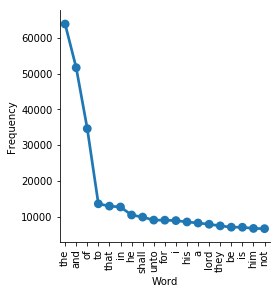

In [125]:
#Line plot with seaborn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

g = sns.factorplot(x='Word',y='Frequency',data=word_count[0:19])
g.set_xticklabels(rotation=90)
plt.show()

In [126]:
#Import stop words
import io
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [127]:
#import stop words
stop = set(stopwords.words('english'))
print(stop)
type(stop)

{'when', 'in', 'those', 'into', 'me', 'herself', 'we', 'if', "aren't", 'out', 'such', "needn't", 'our', 'has', 'again', 'how', 'who', 't', 'below', 'further', 'shan', "you'll", 'i', 'hasn', 'ma', 'above', 'she', 'this', 'an', 'doing', 'nor', 'myself', 'it', 'what', 'by', "isn't", 'from', 'down', 'mightn', 'their', 'mustn', 'up', 'or', "it's", 'until', 'no', 'these', 'so', "shan't", 'isn', 'during', 'here', 'are', 'once', 'can', 'does', 'over', 'theirs', 'themselves', 'to', 'own', 'about', 'd', 'didn', "she's", 'with', 'needn', 'the', 'through', 'some', 'than', 'other', "you'd", 'ours', 'wouldn', 'after', 'ourselves', 'where', 'they', "don't", 'be', 'weren', "you've", 'there', 'yours', 'shouldn', 'being', 'at', "mustn't", 'same', 'its', 'doesn', 'each', 're', 'on', 'is', 'between', 'now', 'my', 's', 'that', 've', "haven't", 'have', 'few', 'her', 'against', 'won', 'which', 'm', "you're", 'hadn', 'were', 'having', "mightn't", 'for', 'more', 'a', 'too', 'under', 'his', 'hers', "that'll", '

set

In [128]:
#Remove stop words from the dataframe
word_count2 = word_count[~word_count['Word'].isin(stop)]
word_count2.head()

,Word,Frequency
143,shall,9838
51,unto,8997
166,lord,7830
231,thou,5474
321,thy,4600


C:\Users\rohan\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


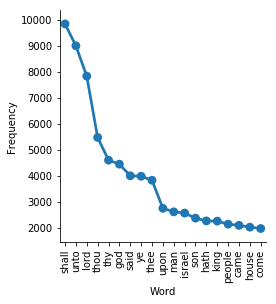

In [129]:
#Plot top 10 words after removing stop words
g = sns.factorplot(x='Word',y='Frequency',data=word_count2[0:19])
g.set_xticklabels(rotation=90)
plt.show()

In [130]:
#Function to plot a dispersion graph
def dispersion(word):
    d = list()
    for i in range(0,len(bible2)):
        if bible2[i] == word:
            d.append(i)

    fig, ax = plt.subplots()
    ax.vlines(d, 0, 1, edgecolor="black") # <-- ANSWER
    ax.set_xlim([0, len(bible2)]) # set the lower and upper limits of graph
    ax.set_xlabel('narrative time')
    ax.set_xticks([0],minor=True) # turn off: ax.set_xticks([])
    ax.set_ylabel(word) # turn off by droping this line
    ax.set_yticks([])
    fig.set_figheight(1)
    plt.show()

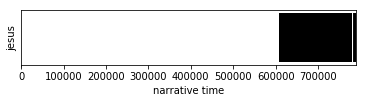

In [131]:
#Dispersion plot for Jesus
dispersion('jesus')

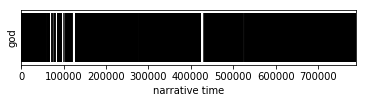

In [132]:
#Dispersion plot for God
dispersion('god')

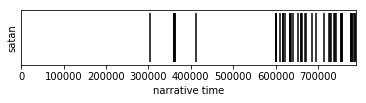

In [133]:
#Dispersion plot for Satan
dispersion('satan')

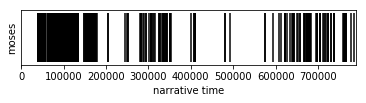

In [134]:
#Dispersion plot for moses
dispersion('moses')

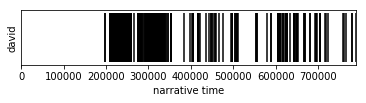

In [135]:
#Dispersion plot for david
dispersion('david')

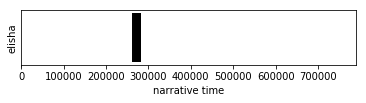

In [137]:
#Dispersion plot for Ishmael
dispersion('elisha')